In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from catboost import CatBoostRegressor

import pickle

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from warnings import filterwarnings
filterwarnings('ignore')

data = pd.read_excel("data_regression.xlsx")
df = data.copy()
df.head()

,Paper No,Specimen,hw,lw,tw,fc,rv,fyv,rh,fyh,rl,fyl,N,tf,hf,M/Vlw,hw/lw,P/Agfc,Ab,Ag,Ab/Ag,ρbl.fybl,ρsh.fysh,ρl.fyl,ρt.fyt,v_test,v_aci,v_tsc2018,v_ec8,v_japan,v_canada,v_kassem,v_hwang,v_gulec,v_ma,v_massone,failure_mode
0,Abdulridha & Palermo (2017),W1-SR,2200.0,1000,150.0,30.5,0.00670,425.00,0.008800,425.000,0.013300,425,0.00,150.0,200.0,2.20,2.200000,0.00,30000.0,150000.0,0.200000,5.652500,7.395000,2.847500,3.740000,155.15,698.537227,749.461472,366.214141,295.305462,760.242724,272.568628,NaN,NaN,NaN,NaN,3.0
1,[114] Adajar et al.1995,RCW1,2000.0,1400,150.0,46.8,0.01180,373.76,0.005660,357.084,0.000000,0,98.28,150.0,0.0,1.43,1.428571,0.01,0.0,210000.0,0.000000,0.000000,0.000000,4.410368,2.021229,666.82,782.286988,751.289323,385.765493,263.601316,691.824550,648.891390,873.108824,376.321892,477.254918,1358.294133,3.0
2,NaN,RCW3,2000.0,1400,150.0,46.6,0.02067,373.76,0.005660,357.084,0.000000,0,97.86,150.0,0.0,1.43,1.428571,0.01,0.0,210000.0,0.000000,0.000000,0.000000,7.725619,2.021229,787.40,781.521532,750.590218,507.887862,263.559316,691.382039,675.176853,871.535207,521.482356,564.087307,1353.254638,1.0
3,"[98] Adebar,2007",High-Rise Core Wall (265),12000.0,1625,127.0,49.0,0.00268,455.00,0.002588,455.000,0.006497,455,1500.00,380.0,203.0,7.38,7.384615,0.10,77140.0,309093.0,0.249569,2.956163,2.667677,1.219476,1.177428,144.75,482.875498,856.165373,235.247732,420.658735,485.648507,851.495719,NaN,NaN,NaN,NaN,3.0
4,"[26] Alarcon,2014",W1 (49),1600.0,700,100.0,27.4,0.00600,445.60,0.004361,608.900,0.031400,469.2,287.40,100.0,100.0,2.50,2.285714,0.15,10000.0,70000.0,0.142857,14.732880,0.000000,2.673600,2.655481,143.15,246.721602,269.243066,196.058722,153.592841,265.139248,155.390141,NaN,NaN,NaN,NaN,2.0


In [ ]:
df1 = df[df["M/Vlw"] <= 2]
df1 = df1[["hw", "lw", "tw", "fc", "rv", "fyv", "rh", "fyh", "rl", "fyl", "N", "tf", "hf", "v_test"]]
df.drop(["rv", "fyv", "rh", "fyh", "rl", "fyl", "N", "tf", "hf"], axis=1, inplace=True)
df1.dropna(inplace=True)
display(df1.head())
print(df1.shape)


,hw,lw,tw,fc,rv,fyv,rh,fyh,rl,fyl,N,tf,hf,v_test
1,2000.0,1400,150.0,46.80,0.011800,373.760000,0.005660,357.084000,0.000000,0,98.28,150.0,0.0,666.820000
2,2000.0,1400,150.0,46.60,0.020670,373.760000,0.005660,357.084000,0.000000,0,97.86,150.0,0.0,787.400000
8,1500.0,1000,100.0,20.15,0.001616,325.000000,0.001413,325.000000,0.080384,425,0.00,100.0,150.0,132.645000
9,1016.0,1016,101.6,46.20,0.007100,660.518008,0.007123,660.518008,0.049087,660.518008,0.00,101.6,101.6,362.530000
10,1016.0,1016,101.6,46.20,0.008300,632.938968,0.008313,632.938968,0.093573,444.022544,0.00,101.6,101.6,445.210651


(345, 14)


In [ ]:
X = df1.drop(['v_test'], axis=1)
y = df1["v_test"]

## XGBoost model proposed by Feng et al.
xgb_model = pickle.load(open("xgb_model.sav", 'rb'))
df1["xgb_preds"] = xgb_model.predict(X)
df1.head()

,hw,lw,tw,fc,rv,fyv,rh,fyh,rl,fyl,N,tf,hf,v_test,xgb_preds
1,2000.0,1400,150.0,46.80,0.011800,373.760000,0.005660,357.084000,0.000000,0,98.28,150.0,0.0,666.820000,686.410278
2,2000.0,1400,150.0,46.60,0.020670,373.760000,0.005660,357.084000,0.000000,0,97.86,150.0,0.0,787.400000,680.635742
8,1500.0,1000,100.0,20.15,0.001616,325.000000,0.001413,325.000000,0.080384,425,0.00,100.0,150.0,132.645000,210.903549
9,1016.0,1016,101.6,46.20,0.007100,660.518008,0.007123,660.518008,0.049087,660.518008,0.00,101.6,101.6,362.530000,583.714905
10,1016.0,1016,101.6,46.20,0.008300,632.938968,0.008313,632.938968,0.093573,444.022544,0.00,101.6,101.6,445.210651,584.531250


In [ ]:
df2 = pd.concat([df, df1[["xgb_preds"]]], axis=1)
df2.head()

,Paper No,Specimen,hw,lw,tw,fc,M/Vlw,hw/lw,P/Agfc,Ab,Ag,Ab/Ag,ρbl.fybl,ρsh.fysh,ρl.fyl,ρt.fyt,v_test,v_aci,v_tsc2018,v_ec8,v_japan,v_canada,v_kassem,v_hwang,v_gulec,v_ma,v_massone,failure_mode,xgb_preds
0,Abdulridha & Palermo (2017),W1-SR,2200.0,1000,150.0,30.5,2.20,2.200000,0.00,30000.0,150000.0,0.200000,5.652500,7.395000,2.847500,3.740000,155.15,698.537227,749.461472,366.214141,295.305462,760.242724,272.568628,NaN,NaN,NaN,NaN,3.0,NaN
1,[114] Adajar et al.1995,RCW1,2000.0,1400,150.0,46.8,1.43,1.428571,0.01,0.0,210000.0,0.000000,0.000000,0.000000,4.410368,2.021229,666.82,782.286988,751.289323,385.765493,263.601316,691.824550,648.891390,873.108824,376.321892,477.254918,1358.294133,3.0,686.410278
2,NaN,RCW3,2000.0,1400,150.0,46.6,1.43,1.428571,0.01,0.0,210000.0,0.000000,0.000000,0.000000,7.725619,2.021229,787.40,781.521532,750.590218,507.887862,263.559316,691.382039,675.176853,871.535207,521.482356,564.087307,1353.254638,1.0,680.635742
3,"[98] Adebar,2007",High-Rise Core Wall (265),12000.0,1625,127.0,49.0,7.38,7.384615,0.10,77140.0,309093.0,0.249569,2.956163,2.667677,1.219476,1.177428,144.75,482.875498,856.165373,235.247732,420.658735,485.648507,851.495719,NaN,NaN,NaN,NaN,3.0,NaN
4,"[26] Alarcon,2014",W1 (49),1600.0,700,100.0,27.4,2.50,2.285714,0.15,10000.0,70000.0,0.142857,14.732880,0.000000,2.673600,2.655481,143.15,246.721602,269.243066,196.058722,153.592841,265.139248,155.390141,NaN,NaN,NaN,NaN,2.0,NaN


In [ ]:
y_tsc2018 = df["v_tsc2018"]
y_aci = df["v_aci"]
y_ec8 = df["v_ec8"]
y_japan = df["v_japan"]
y_canada = df["v_canada"]
y_kassem = df["v_kassem"]
y_hwang = df["v_hwang"]
y_gulec = df["v_gulec"]
y_ma = df["v_ma"]
y_massone = df["v_massone"]
y_mangalathu = df2["xgb_preds"]

In [ ]:
df.drop(["Paper No", "Specimen", "v_aci", "v_tsc2018", "v_japan", "v_canada", "v_ec8",
         "v_kassem", "v_hwang", "v_gulec", "v_ma", "v_massone", "hw/lw"], 
        axis=1, inplace=True)
display(df.head())
print(df.shape)


,hw,lw,tw,fc,M/Vlw,P/Agfc,Ab,Ag,Ab/Ag,ρbl.fybl,ρsh.fysh,ρl.fyl,ρt.fyt,v_test,failure_mode
0,2200.0,1000,150.0,30.5,2.20,0.00,30000.0,150000.0,0.200000,5.652500,7.395000,2.847500,3.740000,155.15,3.0
1,2000.0,1400,150.0,46.8,1.43,0.01,0.0,210000.0,0.000000,0.000000,0.000000,4.410368,2.021229,666.82,3.0
2,2000.0,1400,150.0,46.6,1.43,0.01,0.0,210000.0,0.000000,0.000000,0.000000,7.725619,2.021229,787.40,1.0
3,12000.0,1625,127.0,49.0,7.38,0.10,77140.0,309093.0,0.249569,2.956163,2.667677,1.219476,1.177428,144.75,3.0
4,1600.0,700,100.0,27.4,2.50,0.15,10000.0,70000.0,0.142857,14.732880,0.000000,2.673600,2.655481,143.15,2.0


(497, 15)


In [ ]:
df.isnull().sum()

hw               0
lw               0
tw               0
fc               0
M/Vlw            0
P/Agfc           0
Ab               0
Ag               0
Ab/Ag            0
ρbl.fybl         4
ρsh.fysh        20
ρl.fyl           0
ρt.fyt           0
v_test          24
failure_mode     6
dtype: int64

In [ ]:
df.dropna(inplace=True, axis=0)
df.shape

(470, 15)

In [ ]:
X = df.drop(['v_test'], axis=1)
y = df["v_test"]

### CatBoost Model with 12 Features

In [ ]:
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rc('axes', labelsize=35)
plt.rc('axes', titlesize=35)
plt.rc('xtick', labelsize=35)
plt.rc('ytick', labelsize=35)


X_fs = X[['tw', 'lw', 'hw', 'M/Vlw', 'P/Agfc', 'fc', 'Ab', 'Ag',
       'ρbl.fybl', 'ρl.fyl', 'ρt.fyt', 'failure_mode']]
X_fs.head()

,tw,lw,hw,M/Vlw,P/Agfc,fc,Ab,Ag,ρbl.fybl,ρl.fyl,ρt.fyt,failure_mode
0,150.0,1000,2200.0,2.20,0.00,30.5,30000.0,150000.0,5.652500,2.847500,3.740000,3.0
1,150.0,1400,2000.0,1.43,0.01,46.8,0.0,210000.0,0.000000,4.410368,2.021229,3.0
2,150.0,1400,2000.0,1.43,0.01,46.6,0.0,210000.0,0.000000,7.725619,2.021229,1.0
3,127.0,1625,12000.0,7.38,0.10,49.0,77140.0,309093.0,2.956163,1.219476,1.177428,3.0
4,100.0,700,1600.0,2.50,0.15,27.4,10000.0,70000.0,14.732880,2.673600,2.655481,2.0


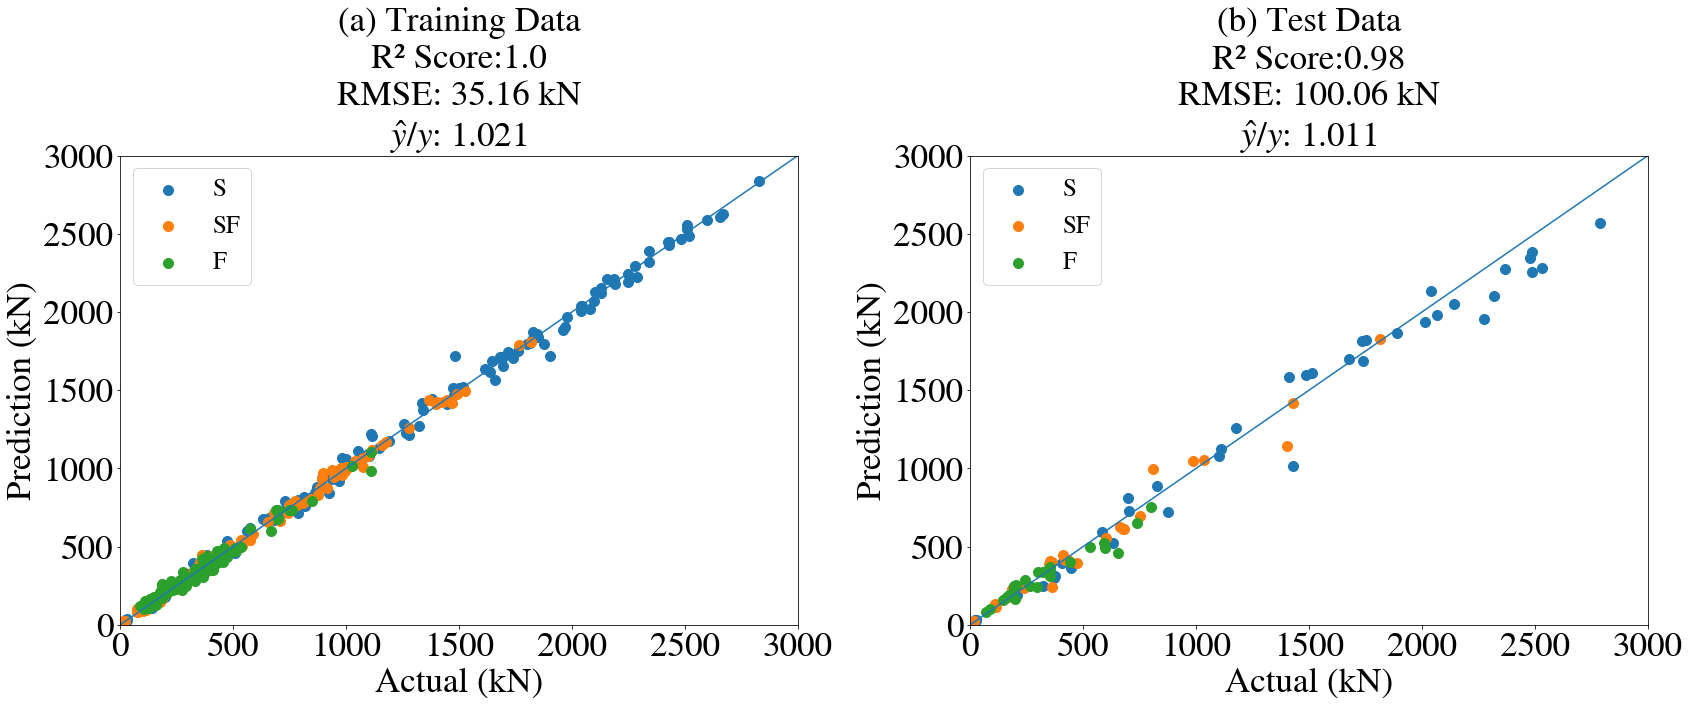

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fs, y, test_size=0.2, random_state=8316)
catb_tuned = CatBoostRegressor(iterations=1500, depth=3, silent=True, loss_function="Poisson").fit(X_train, y_train)
y_pred_test = catb_tuned.predict(X_test)
y_pred_train = catb_tuned.predict(X_train)

X_test.reset_index(inplace=True, drop=True)
X_train.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

acc_score_train = r2_score(y_pred_train, y_train)
acc_score_test = r2_score(y_pred_test, y_test)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
pratio_train = np.mean(y_pred_train / y_train)
pratio_test = np.mean(y_pred_test / y_test)

fig, axs = plt.subplots(1, 2, figsize=(25, 10))
plt.tight_layout(pad=10.0)

S_index = X_train[X_train["failure_mode"]==1].index
SF_index = X_train[X_train["failure_mode"]==2].index
F_index = X_train[X_train["failure_mode"]==3].index

axs[0].scatter(x=y_train.loc[S_index], y=y_pred_train[S_index], s=100)
axs[0].scatter(x=y_train.loc[SF_index], y=y_pred_train[SF_index], s=100)
axs[0].scatter(x=y_train.loc[F_index], y=y_pred_train[F_index], s=100)
axs[0].legend(["S", "SF", "F"], fontsize=25)
axs[0].set_xlim([0, 3000])
axs[0].set_ylim([0, 3000])
axs[0].plot([0,1],[0,1], transform=axs[0].transAxes)
axs[0].set_xlabel('Actual (kN)')
axs[0].set_ylabel("Prediction (kN)")
axs[0].set_title(f"(a) Training Data\nR\u00b2 Score:{round(r2_score(y_pred_train, y_train), 2)}\nRMSE: {round(mean_squared_error(y_train, y_pred_train, squared=False), 2)} kN\n" + r"$\hat{y}/y$: " + f"{round(pratio_train, 3)}")


S_index = X_test[X_test["failure_mode"]==1].index
SF_index = X_test[X_test["failure_mode"]==2].index
F_index = X_test[X_test["failure_mode"]==3].index

axs[1].scatter(x=y_test.loc[S_index], y=y_pred_test[S_index], s=100)
axs[1].scatter(x=y_test.loc[SF_index], y=y_pred_test[SF_index], s=100)
axs[1].scatter(x=y_test.loc[F_index], y=y_pred_test[F_index], s=100)
axs[1].legend(["S", "SF", "F"], fontsize=25)
axs[1].set_xlim([0, 3000])
axs[1].set_ylim([0, 3000])
axs[1].plot([0,1],[0,1], transform=axs[1].transAxes)
axs[1].set_xlabel('Actual (kN)')
axs[1].set_ylabel("Prediction (kN)")
axs[1].set_title(f"(b) Test Data\nR\u00b2 Score:{round(r2_score(y_pred_test, y_test), 2)}\nRMSE: {round(mean_squared_error(y_test, y_pred_test, squared=False), 2)} kN\n" + r"$\hat{y}/y$: " + f"{round(pratio_test, 3)}")


plt.show()

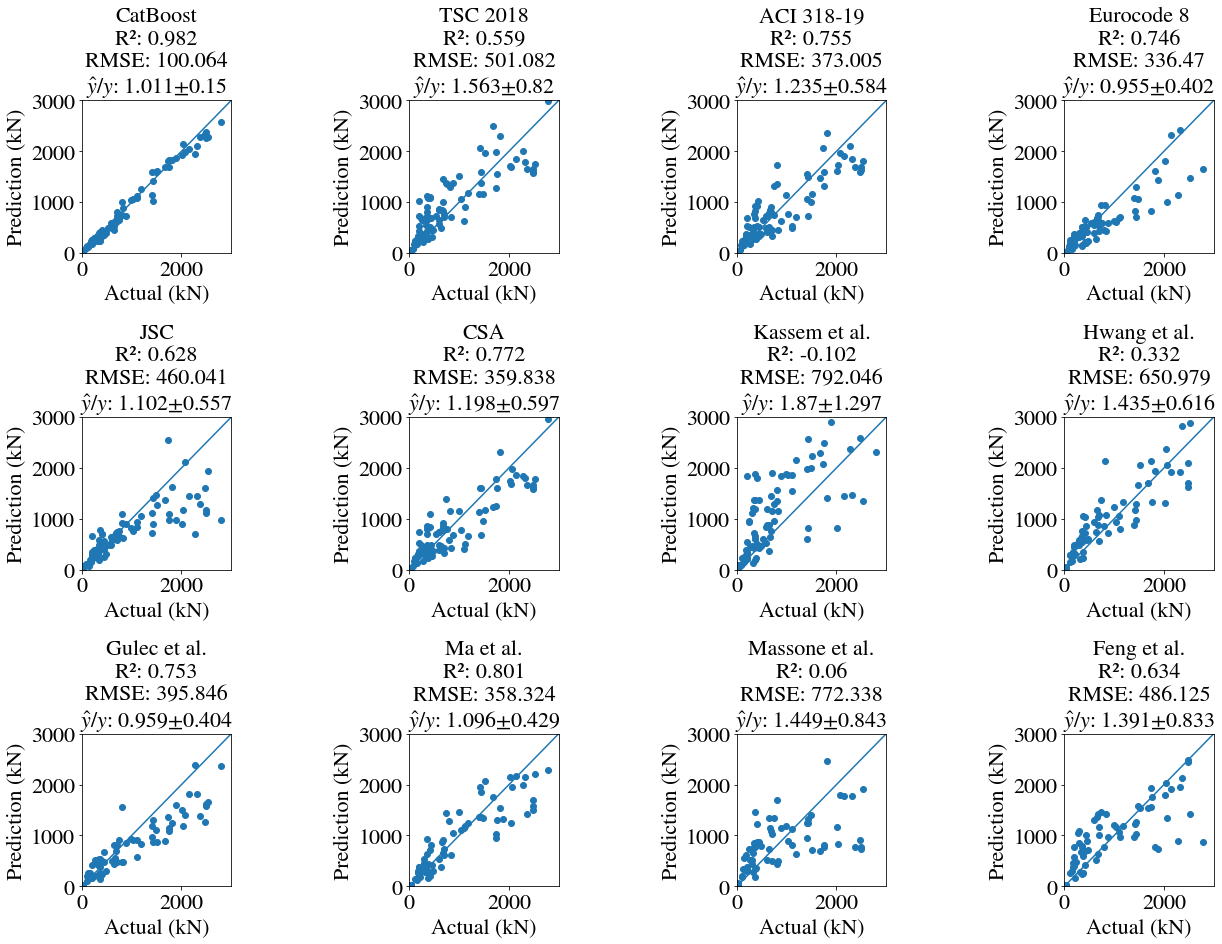

In [ ]:
plt.rc('axes', labelsize=22)
plt.rc('axes', titlesize=22)
plt.rc('xtick', labelsize=22)  
plt.rc('ytick', labelsize=22)

X_train, X_test, y_train, y_test = train_test_split(X_fs, y, test_size=0.2, random_state=8316)

y_pred_tsc2018 = y_tsc2018[y_test.index]
y_pred_aci = y_aci[y_test.index]
y_pred_ec8 = y_ec8[y_test.index]
y_pred_ec8.dropna(inplace=True)
y_pred_japan = y_japan[y_test.index]
y_pred_japan.dropna(inplace=True)
y_pred_canada = y_canada[y_test.index]
y_pred_canada.dropna(inplace=True)
y_pred_kassem = y_kassem[y_test.index]
y_pred_kassem.dropna(inplace=True)
y_pred_hwang = y_hwang[y_test.index]
y_pred_hwang.dropna(inplace=True)
y_pred_gulec = y_gulec[y_test.index]
y_pred_gulec.dropna(inplace=True)
y_pred_ma = y_ma[y_test.index]
y_pred_ma.dropna(inplace=True)
y_pred_massone = y_massone[y_test.index]
y_pred_massone.dropna(inplace=True)
y_pred_mangalathu = y_mangalathu[y_test.index]
y_pred_mangalathu.dropna(inplace=True)

y_pred = catb_tuned.predict(X_test.loc[y_pred_tsc2018.index, :])

r_score = r2_score(y_test.loc[y_pred_tsc2018.index], y_pred)
r_score_tsc2018 = r2_score(y_test.loc[y_pred_tsc2018.index], y_pred_tsc2018)
r_score_aci = r2_score(y_test.loc[y_pred_aci.index], y_pred_aci)
r_score_ec8 = r2_score(y_test.loc[y_pred_ec8.index], y_pred_ec8)
r_score_japan = r2_score(y_test.loc[y_pred_japan.index], y_pred_japan)
r_score_canada = r2_score(y_test.loc[y_pred_canada.index], y_pred_canada)
r_score_kassem = r2_score(y_test.loc[y_pred_kassem.index], y_pred_kassem)
r_score_hwang = r2_score(y_test.loc[y_pred_hwang.index], y_pred_hwang)
r_score_gulec = r2_score(y_test.loc[y_pred_gulec.index], y_pred_gulec)
r_score_ma = r2_score(y_test.loc[y_pred_ma.index], y_pred_ma)
r_score_massone = r2_score(y_test.loc[y_pred_massone.index], y_pred_massone)
r_score_mangalathu = r2_score(y_test.loc[y_pred_mangalathu.index], y_pred_mangalathu)


rmse = mean_squared_error(y_test.loc[y_pred_tsc2018.index], y_pred, squared=False)
rmse_tsc2018 = mean_squared_error(y_test.loc[y_pred_tsc2018.index], y_pred_tsc2018, squared=False)
rmse_aci = mean_squared_error(y_test.loc[y_pred_tsc2018.index], y_pred_aci, squared=False)
rmse_ec8 = mean_squared_error(y_test.loc[y_pred_ec8.index], y_pred_ec8, squared=False)
rmse_japan = mean_squared_error(y_test.loc[y_pred_japan.index], y_pred_japan, squared=False)
rmse_canada = mean_squared_error(y_test.loc[y_pred_canada.index], y_pred_canada, squared=False)
rmse_kassem = mean_squared_error(y_test.loc[y_pred_kassem.index], y_pred_kassem, squared=False)
rmse_hwang = mean_squared_error(y_test.loc[y_pred_hwang.index], y_pred_hwang, squared=False)
rmse_gulec = mean_squared_error(y_test.loc[y_pred_gulec.index], y_pred_gulec, squared=False)
rmse_ma = mean_squared_error(y_test.loc[y_pred_ma.index], y_pred_ma, squared=False)
rmse_massone = mean_squared_error(y_test.loc[y_pred_massone.index], y_pred_massone, squared=False)
rmse_mangalathu = mean_squared_error(y_test.loc[y_pred_mangalathu.index], y_pred_mangalathu, squared=False)


prediction_ratio = str(np.round(np.mean(y_pred / y_test.loc[y_pred_tsc2018.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred / y_test.loc[y_pred_tsc2018.index]), 3))
prediction_ratio_tsc2018 = str(np.round(np.mean(y_pred_tsc2018 / y_test.loc[y_pred_tsc2018.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_tsc2018 / y_test.loc[y_pred_tsc2018.index]), 3))
prediction_ratio_aci = str(np.round(np.mean(y_pred_aci / y_test.loc[y_pred_aci.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_aci / y_test.loc[y_pred_aci.index]), 3))
prediction_ratio_ec8 = str(np.round(np.mean(y_pred_ec8 / y_test.loc[y_pred_ec8.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_ec8 / y_test.loc[y_pred_ec8.index]), 3))
prediction_ratio_japan = str(np.round(np.mean(y_pred_japan / y_test.loc[y_pred_japan.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_japan / y_test.loc[y_pred_japan.index]), 3))
prediction_ratio_canada = str(np.round(np.mean(y_pred_canada / y_test.loc[y_pred_canada.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_canada / y_test.loc[y_pred_canada.index]), 3))
prediction_ratio_kassem = str(np.round(np.mean(y_pred_kassem / y_test.loc[y_pred_kassem.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_kassem / y_test.loc[y_pred_kassem.index]), 3))
prediction_ratio_hwang = str(np.round(np.mean(y_pred_hwang / y_test.loc[y_pred_hwang.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_hwang / y_test.loc[y_pred_hwang.index]), 3))
prediction_ratio_gulec = str(np.round(np.mean(y_pred_gulec / y_test.loc[y_pred_gulec.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_gulec / y_test.loc[y_pred_gulec.index]), 3))
prediction_ratio_ma = str(np.round(np.mean(y_pred_ma / y_test.loc[y_pred_ma.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_ma / y_test.loc[y_pred_ma.index]), 3))
prediction_ratio_massone = str(np.round(np.mean(y_pred_massone / y_test.loc[y_pred_massone.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_massone / y_test.loc[y_pred_massone.index]), 3))
prediction_ratio_mangalathu = str(np.round(np.mean(y_pred_mangalathu / y_test.loc[y_pred_mangalathu.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_mangalathu / y_test.loc[y_pred_mangalathu.index]), 3))

fig, axs = plt.subplots(3, 4, figsize=(20, 15))
plt.tight_layout(pad=13.0)
axs[0, 0].scatter(y_test.loc[y_pred_tsc2018.index], y_pred)
axs[0, 0].set_xlim([0, 3000])
axs[0, 0].set_ylim([0, 3000])
axs[0, 0].plot([0,1],[0,1], transform=axs[0, 0].transAxes)
axs[0, 0].set_xlabel('Actual (kN)')
axs[0, 0].set_ylabel("Prediction (kN)")
axs[0, 0].set_title(f"CatBoost\nR\u00b2: {round(r_score, 3)}\nRMSE: {round(rmse, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio)

axs[0, 1].scatter(y_test.loc[y_pred_tsc2018.index], y_pred_tsc2018)
axs[0, 1].set_xlim([0, 3000])
axs[0, 1].set_ylim([0, 3000])
axs[0, 1].plot([0,1],[0,1], transform=axs[0, 1].transAxes)
axs[0, 1].set_xlabel('Actual (kN)')
axs[0, 1].set_ylabel("Prediction (kN)")
axs[0, 1].set_title(f"TSC 2018\nR\u00b2: {round(r_score_tsc2018, 3)}\nRMSE: {round(rmse_tsc2018, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_tsc2018)

axs[0, 2].scatter(y_test.loc[y_pred_tsc2018.index], y_pred_aci)
axs[0, 2].set_xlim([0, 3000])
axs[0, 2].set_ylim([0, 3000])
axs[0, 2].plot([0,1],[0,1], transform=axs[0, 2].transAxes)
axs[0, 2].set_xlabel('Actual (kN)')
axs[0, 2].set_ylabel("Prediction (kN)")
axs[0, 2].set_title(f"ACI 318-19\nR\u00b2: {round(r_score_aci, 3)}\nRMSE: {round(rmse_aci, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_aci)

axs[0, 3].scatter(y_test.loc[y_pred_ec8.index], y_pred_ec8)
axs[0, 3].set_xlim([0, 3000])
axs[0, 3].set_ylim([0, 3000])
axs[0, 3].plot([0,1],[0,1], transform=axs[0, 3].transAxes)
axs[0, 3].set_xlabel('Actual (kN)')
axs[0, 3].set_ylabel("Prediction (kN)")
axs[0, 3].set_title(f"Eurocode 8\nR\u00b2: {round(r_score_ec8, 3)}\nRMSE: {round(rmse_ec8, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_ec8)


axs[1, 0].scatter(y_test.loc[y_pred_japan.index], y_pred_japan)
axs[1, 0].set_xlim([0, 3000])
axs[1, 0].set_ylim([0, 3000])
axs[1, 0].plot([0,1],[0,1], transform=axs[1, 0].transAxes)
axs[1, 0].set_xlabel('Actual (kN)')
axs[1, 0].set_ylabel("Prediction (kN)")
axs[1, 0].set_title(f"JSC\nR\u00b2: {round(r_score_japan, 3)}\nRMSE: {round(rmse_japan, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_japan)

axs[1, 1].scatter(y_test.loc[y_pred_canada.index], y_pred_canada)
axs[1, 1].set_xlim([0, 3000])
axs[1, 1].set_ylim([0, 3000])
axs[1, 1].plot([0,1],[0,1], transform=axs[1, 1].transAxes)
axs[1, 1].set_xlabel('Actual (kN)')
axs[1, 1].set_ylabel("Prediction (kN)")
axs[1, 1].set_title(f"CSA\nR\u00b2: {round(r_score_canada, 3)}\nRMSE: {round(rmse_canada, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_canada)

axs[1, 2].scatter(y_test.loc[y_pred_kassem.index], y_pred_kassem)
axs[1, 2].set_xlim([0, 3000])
axs[1, 2].set_ylim([0, 3000])
axs[1, 2].plot([0,1],[0,1], transform=axs[1, 2].transAxes)
axs[1, 2].set_xlabel('Actual (kN)')
axs[1, 2].set_ylabel("Prediction (kN)")
axs[1, 2].set_title(f"Kassem et al.\nR\u00b2: {round(r_score_kassem, 3)}\nRMSE: {round(rmse_kassem, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_kassem)

axs[1, 3].scatter(y_test.loc[y_pred_hwang.index], y_pred_hwang)
axs[1, 3].set_xlim([0, 3000])
axs[1, 3].set_ylim([0, 3000])
axs[1, 3].plot([0,1],[0,1], transform=axs[1, 3].transAxes)
axs[1, 3].set_xlabel('Actual (kN)')
axs[1, 3].set_ylabel("Prediction (kN)")
axs[1, 3].set_title(f"Hwang et al.\nR\u00b2: {round(r_score_hwang, 3)}\nRMSE: {round(rmse_hwang, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_hwang)


axs[2, 0].scatter(y_test.loc[y_pred_gulec.index], y_pred_gulec)
axs[2, 0].set_xlim([0, 3000])
axs[2, 0].set_ylim([0, 3000])
axs[2, 0].plot([0,1],[0,1], transform=axs[2, 0].transAxes)
axs[2, 0].set_xlabel('Actual (kN)')
axs[2, 0].set_ylabel("Prediction (kN)")
axs[2, 0].set_title(f"Gulec et al.\nR\u00b2: {round(r_score_gulec, 3)}\nRMSE: {round(rmse_gulec, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_gulec)

axs[2, 1].scatter(y_test.loc[y_pred_ma.index], y_pred_ma)
axs[2, 1].set_xlim([0, 3000])
axs[2, 1].set_ylim([0, 3000])
axs[2, 1].plot([0,1],[0,1], transform=axs[2, 1].transAxes)
axs[2, 1].set_xlabel('Actual (kN)')
axs[2, 1].set_ylabel("Prediction (kN)")
axs[2, 1].set_title(f"Ma et al.\nR\u00b2: {round(r_score_ma, 3)}\nRMSE: {round(rmse_ma, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_ma)

axs[2, 2].scatter(y_test.loc[y_pred_massone.index], y_pred_massone)
axs[2, 2].set_xlim([0, 3000])
axs[2, 2].set_ylim([0, 3000])
axs[2, 2].plot([0,1],[0,1], transform=axs[2, 2].transAxes)
axs[2, 2].set_xlabel('Actual (kN)')
axs[2, 2].set_ylabel("Prediction (kN)")
axs[2, 2].set_title(f"Massone et al.\nR\u00b2: {round(r_score_massone, 3)}\nRMSE: {round(rmse_massone, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_massone)


axs[2, 3].scatter(y_test.loc[y_pred_mangalathu.index], y_pred_mangalathu)
axs[2, 3].set_xlim([0, 3000])
axs[2, 3].set_ylim([0, 3000])
axs[2, 3].plot([0,1],[0,1], transform=axs[2, 3].transAxes)
axs[2, 3].set_xlabel('Actual (kN)')
axs[2, 3].set_ylabel("Prediction (kN)")
axs[2, 3].set_title(f"Feng et al.\nR\u00b2: {round(r_score_mangalathu, 3)}\nRMSE: {round(rmse_mangalathu, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_mangalathu)

plt.show()

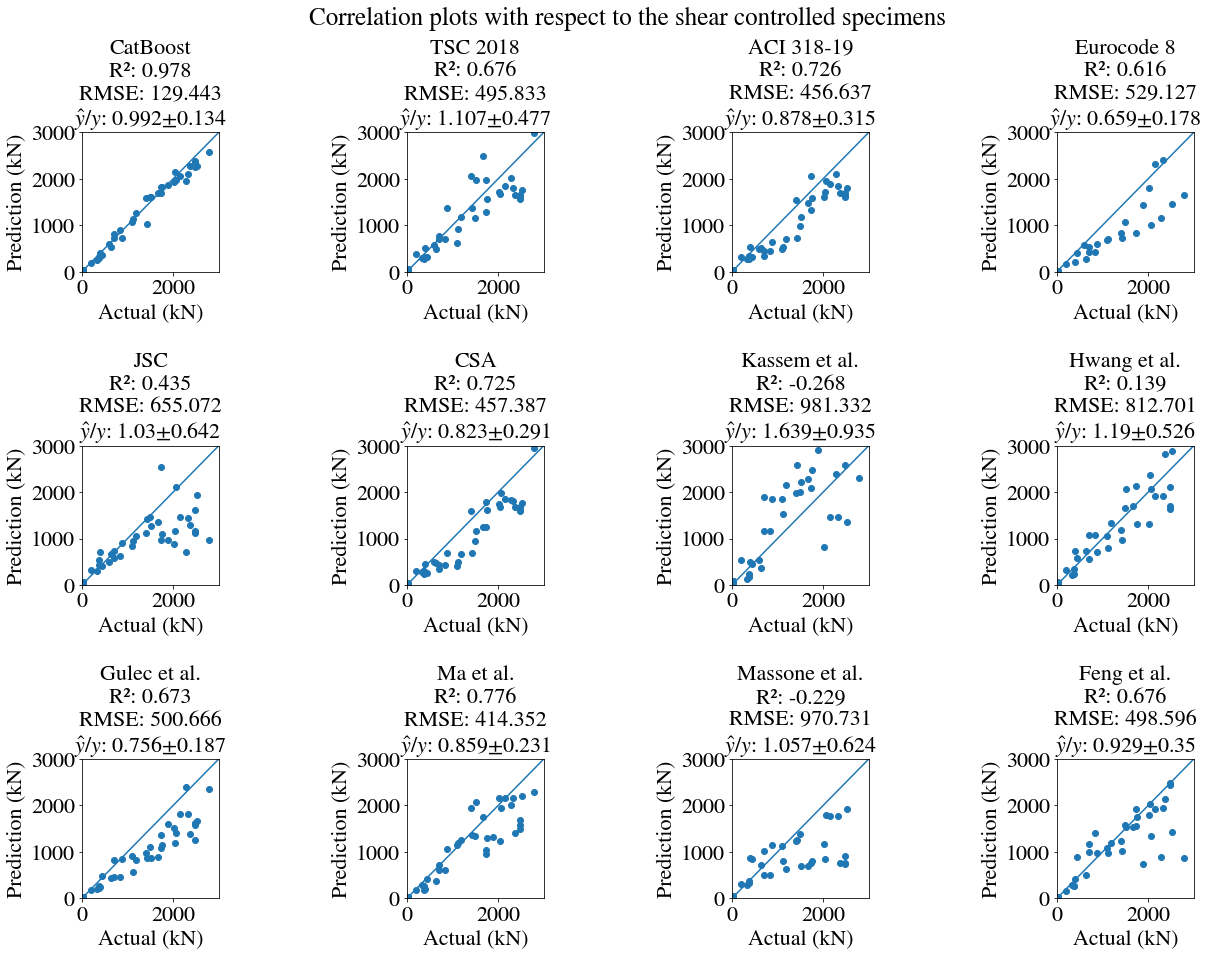

In [ ]:
y_pred_tsc2018 = y_tsc2018[X_test[X_test["failure_mode"]==1].index]
y_pred_aci = y_aci[X_test[X_test["failure_mode"]==1].index]
y_pred_ec8 = y_ec8[X_test[X_test["failure_mode"]==1].index]
y_pred_ec8.dropna(inplace=True)
y_pred_japan = y_japan[X_test[X_test["failure_mode"]==1].index]
y_pred_japan.dropna(inplace=True)
y_pred_canada = y_canada[X_test[X_test["failure_mode"]==1].index]
y_pred_canada.dropna(inplace=True)
y_pred_kassem = y_kassem[X_test[X_test["failure_mode"]==1].index]
y_pred_kassem.dropna(inplace=True)
y_pred_hwang = y_hwang[X_test[X_test["failure_mode"]==1].index]
y_pred_hwang.dropna(inplace=True)
y_pred_gulec = y_gulec[X_test[X_test["failure_mode"]==1].index]
y_pred_gulec.dropna(inplace=True)
y_pred_ma = y_ma[X_test[X_test["failure_mode"]==1].index]
y_pred_ma.dropna(inplace=True)
y_pred_massone = y_massone[X_test[X_test["failure_mode"]==1].index]
y_pred_massone.dropna(inplace=True)
y_pred_mangalathu = y_mangalathu[X_test[X_test["failure_mode"]==1].index]
y_pred_mangalathu.dropna(inplace=True)

y_pred = catb_tuned.predict(X_test.loc[y_pred_tsc2018.index, :])

r_score = r2_score(y_test.loc[y_pred_tsc2018.index], y_pred)
r_score_tsc2018 = r2_score(y_test.loc[y_pred_tsc2018.index], y_pred_tsc2018)
r_score_aci = r2_score(y_test.loc[y_pred_aci.index], y_pred_aci)
r_score_ec8 = r2_score(y_test.loc[y_pred_ec8.index], y_pred_ec8)
r_score_japan = r2_score(y_test.loc[y_pred_japan.index], y_pred_japan)
r_score_canada = r2_score(y_test.loc[y_pred_canada.index], y_pred_canada)
r_score_kassem = r2_score(y_test.loc[y_pred_kassem.index], y_pred_kassem)
r_score_hwang = r2_score(y_test.loc[y_pred_hwang.index], y_pred_hwang)
r_score_gulec = r2_score(y_test.loc[y_pred_gulec.index], y_pred_gulec)
r_score_ma = r2_score(y_test.loc[y_pred_ma.index], y_pred_ma)
r_score_massone = r2_score(y_test.loc[y_pred_massone.index], y_pred_massone)
r_score_mangalathu = r2_score(y_test.loc[y_pred_mangalathu.index], y_pred_mangalathu)


rmse = mean_squared_error(y_test.loc[y_pred_tsc2018.index], y_pred, squared=False)
rmse_tsc2018 = mean_squared_error(y_test.loc[y_pred_tsc2018.index], y_pred_tsc2018, squared=False)
rmse_aci = mean_squared_error(y_test.loc[y_pred_tsc2018.index], y_pred_aci, squared=False)
rmse_ec8 = mean_squared_error(y_test.loc[y_pred_ec8.index], y_pred_ec8, squared=False)
rmse_japan = mean_squared_error(y_test.loc[y_pred_japan.index], y_pred_japan, squared=False)
rmse_canada = mean_squared_error(y_test.loc[y_pred_canada.index], y_pred_canada, squared=False)
rmse_kassem = mean_squared_error(y_test.loc[y_pred_kassem.index], y_pred_kassem, squared=False)
rmse_hwang = mean_squared_error(y_test.loc[y_pred_hwang.index], y_pred_hwang, squared=False)
rmse_gulec = mean_squared_error(y_test.loc[y_pred_gulec.index], y_pred_gulec, squared=False)
rmse_ma = mean_squared_error(y_test.loc[y_pred_ma.index], y_pred_ma, squared=False)
rmse_massone = mean_squared_error(y_test.loc[y_pred_massone.index], y_pred_massone, squared=False)
rmse_mangalathu = mean_squared_error(y_test.loc[y_pred_mangalathu.index], y_pred_mangalathu, squared=False)


prediction_ratio = str(np.round(np.mean(y_pred / y_test.loc[y_pred_tsc2018.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred / y_test.loc[y_pred_tsc2018.index]), 3))
prediction_ratio_tsc2018 = str(np.round(np.mean(y_pred_tsc2018 / y_test.loc[y_pred_tsc2018.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_tsc2018 / y_test.loc[y_pred_tsc2018.index]), 3))
prediction_ratio_aci = str(np.round(np.mean(y_pred_aci / y_test.loc[y_pred_aci.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_aci / y_test.loc[y_pred_aci.index]), 3))
prediction_ratio_ec8 = str(np.round(np.mean(y_pred_ec8 / y_test.loc[y_pred_ec8.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_ec8 / y_test.loc[y_pred_ec8.index]), 3))
prediction_ratio_japan = str(np.round(np.mean(y_pred_japan / y_test.loc[y_pred_japan.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_japan / y_test.loc[y_pred_japan.index]), 3))
prediction_ratio_canada = str(np.round(np.mean(y_pred_canada / y_test.loc[y_pred_canada.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_canada / y_test.loc[y_pred_canada.index]), 3))
prediction_ratio_kassem = str(np.round(np.mean(y_pred_kassem / y_test.loc[y_pred_kassem.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_kassem / y_test.loc[y_pred_kassem.index]), 3))
prediction_ratio_hwang = str(np.round(np.mean(y_pred_hwang / y_test.loc[y_pred_hwang.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_hwang / y_test.loc[y_pred_hwang.index]), 3))
prediction_ratio_gulec = str(np.round(np.mean(y_pred_gulec / y_test.loc[y_pred_gulec.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_gulec / y_test.loc[y_pred_gulec.index]), 3))
prediction_ratio_ma = str(np.round(np.mean(y_pred_ma / y_test.loc[y_pred_ma.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_ma / y_test.loc[y_pred_ma.index]), 3))
prediction_ratio_massone = str(np.round(np.mean(y_pred_massone / y_test.loc[y_pred_massone.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_massone / y_test.loc[y_pred_massone.index]), 3))
prediction_ratio_mangalathu = str(np.round(np.mean(y_pred_mangalathu / y_test.loc[y_pred_mangalathu.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_mangalathu / y_test.loc[y_pred_mangalathu.index]), 3))


fig, axs = plt.subplots(3, 4, figsize=(20, 15))
plt.tight_layout(pad=14.0)
axs[0, 0].scatter(y_test.loc[y_pred_tsc2018.index], y_pred)
axs[0, 0].set_xlim([0, 3000])
axs[0, 0].set_ylim([0, 3000])
axs[0, 0].plot([0,1],[0,1], transform=axs[0, 0].transAxes)
axs[0, 0].set_xlabel('Actual (kN)')
axs[0, 0].set_ylabel("Prediction (kN)")
axs[0, 0].set_title(f"CatBoost\nR\u00b2: {round(r_score, 3)}\nRMSE: {round(rmse, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio)

axs[0, 1].scatter(y_test.loc[y_pred_tsc2018.index], y_pred_tsc2018)
axs[0, 1].set_xlim([0, 3000])
axs[0, 1].set_ylim([0, 3000])
axs[0, 1].plot([0,1],[0,1], transform=axs[0, 1].transAxes)
axs[0, 1].set_xlabel('Actual (kN)')
axs[0, 1].set_ylabel("Prediction (kN)")
axs[0, 1].set_title(f"TSC 2018\nR\u00b2: {round(r_score_tsc2018, 3)}\nRMSE: {round(rmse_tsc2018, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_tsc2018)

axs[0, 2].scatter(y_test.loc[y_pred_tsc2018.index], y_pred_aci)
axs[0, 2].set_xlim([0, 3000])
axs[0, 2].set_ylim([0, 3000])
axs[0, 2].plot([0,1],[0,1], transform=axs[0, 2].transAxes)
axs[0, 2].set_xlabel('Actual (kN)')
axs[0, 2].set_ylabel("Prediction (kN)")
axs[0, 2].set_title(f"ACI 318-19\nR\u00b2: {round(r_score_aci, 3)}\nRMSE: {round(rmse_aci, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_aci)

axs[0, 3].scatter(y_test.loc[y_pred_ec8.index], y_pred_ec8)
axs[0, 3].set_xlim([0, 3000])
axs[0, 3].set_ylim([0, 3000])
axs[0, 3].plot([0,1],[0,1], transform=axs[0, 3].transAxes)
axs[0, 3].set_xlabel('Actual (kN)')
axs[0, 3].set_ylabel("Prediction (kN)")
axs[0, 3].set_title(f"Eurocode 8\nR\u00b2: {round(r_score_ec8, 3)}\nRMSE: {round(rmse_ec8, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_ec8)


axs[1, 0].scatter(y_test.loc[y_pred_japan.index], y_pred_japan)
axs[1, 0].set_xlim([0, 3000])
axs[1, 0].set_ylim([0, 3000])
axs[1, 0].plot([0,1],[0,1], transform=axs[1, 0].transAxes)
axs[1, 0].set_xlabel('Actual (kN)')
axs[1, 0].set_ylabel("Prediction (kN)")
axs[1, 0].set_title(f"JSC\nR\u00b2: {round(r_score_japan, 3)}\nRMSE: {round(rmse_japan, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_japan)

axs[1, 1].scatter(y_test.loc[y_pred_canada.index], y_pred_canada)
axs[1, 1].set_xlim([0, 3000])
axs[1, 1].set_ylim([0, 3000])
axs[1, 1].plot([0,1],[0,1], transform=axs[1, 1].transAxes)
axs[1, 1].set_xlabel('Actual (kN)')
axs[1, 1].set_ylabel("Prediction (kN)")
axs[1, 1].set_title(f"CSA\nR\u00b2: {round(r_score_canada, 3)}\nRMSE: {round(rmse_canada, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_canada)

axs[1, 2].scatter(y_test.loc[y_pred_kassem.index], y_pred_kassem)
axs[1, 2].set_xlim([0, 3000])
axs[1, 2].set_ylim([0, 3000])
axs[1, 2].plot([0,1],[0,1], transform=axs[1, 2].transAxes)
axs[1, 2].set_xlabel('Actual (kN)')
axs[1, 2].set_ylabel("Prediction (kN)")
axs[1, 2].set_title(f"Kassem et al.\nR\u00b2: {round(r_score_kassem, 3)}\nRMSE: {round(rmse_kassem, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_kassem)

axs[1, 3].scatter(y_test.loc[y_pred_hwang.index], y_pred_hwang)
axs[1, 3].set_xlim([0, 3000])
axs[1, 3].set_ylim([0, 3000])
axs[1, 3].plot([0,1],[0,1], transform=axs[1, 3].transAxes)
axs[1, 3].set_xlabel('Actual (kN)')
axs[1, 3].set_ylabel("Prediction (kN)")
axs[1, 3].set_title(f"Hwang et al.\nR\u00b2: {round(r_score_hwang, 3)}\nRMSE: {round(rmse_hwang, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_hwang)


axs[2, 0].scatter(y_test.loc[y_pred_gulec.index], y_pred_gulec)
axs[2, 0].set_xlim([0, 3000])
axs[2, 0].set_ylim([0, 3000])
axs[2, 0].plot([0,1],[0,1], transform=axs[2, 0].transAxes)
axs[2, 0].set_xlabel('Actual (kN)')
axs[2, 0].set_ylabel("Prediction (kN)")
axs[2, 0].set_title(f"Gulec et al.\nR\u00b2: {round(r_score_gulec, 3)}\nRMSE: {round(rmse_gulec, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_gulec)

axs[2, 1].scatter(y_test.loc[y_pred_ma.index], y_pred_ma)
axs[2, 1].set_xlim([0, 3000])
axs[2, 1].set_ylim([0, 3000])
axs[2, 1].plot([0,1],[0,1], transform=axs[2, 1].transAxes)
axs[2, 1].set_xlabel('Actual (kN)')
axs[2, 1].set_ylabel("Prediction (kN)")
axs[2, 1].set_title(f"Ma et al.\nR\u00b2: {round(r_score_ma, 3)}\nRMSE: {round(rmse_ma, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_ma)

axs[2, 2].scatter(y_test.loc[y_pred_massone.index], y_pred_massone)
axs[2, 2].set_xlim([0, 3000])
axs[2, 2].set_ylim([0, 3000])
axs[2, 2].plot([0,1],[0,1], transform=axs[2, 2].transAxes)
axs[2, 2].set_xlabel('Actual (kN)')
axs[2, 2].set_ylabel("Prediction (kN)")
axs[2, 2].set_title(f"Massone et al.\nR\u00b2: {round(r_score_massone, 3)}\nRMSE: {round(rmse_massone, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_massone)

axs[2, 3].scatter(y_test.loc[y_pred_mangalathu.index], y_pred_mangalathu)
axs[2, 3].set_xlim([0, 3000])
axs[2, 3].set_ylim([0, 3000])
axs[2, 3].plot([0,1],[0,1], transform=axs[2, 3].transAxes)
axs[2, 3].set_xlabel('Actual (kN)')
axs[2, 3].set_ylabel("Prediction (kN)")
axs[2, 3].set_title(f"Feng et al.\nR\u00b2: {round(r_score_mangalathu, 3)}\nRMSE: {round(rmse_mangalathu, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_mangalathu)

fig.suptitle('Correlation plots with respect to the shear controlled specimens', fontsize=25)

plt.show()

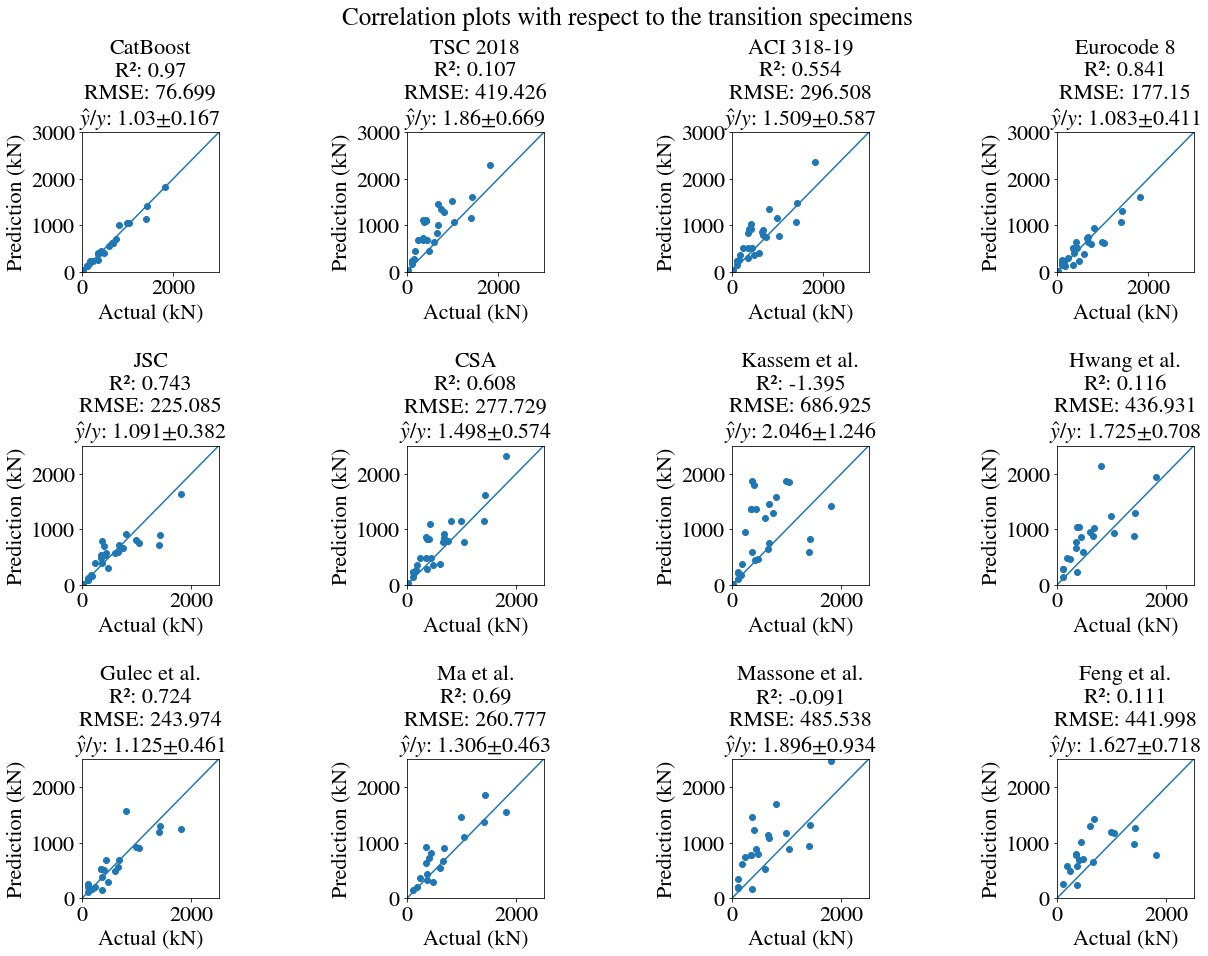

In [ ]:
y_pred_tsc2018 = y_tsc2018[X_test[X_test["failure_mode"]==2].index]
y_pred_aci = y_aci[X_test[X_test["failure_mode"]==2].index]
y_pred_ec8 = y_ec8[X_test[X_test["failure_mode"]==2].index]
y_pred_ec8.dropna(inplace=True)
y_pred_japan = y_japan[X_test[X_test["failure_mode"]==2].index]
y_pred_japan.dropna(inplace=True)
y_pred_canada = y_canada[X_test[X_test["failure_mode"]==2].index]
y_pred_canada.dropna(inplace=True)
y_pred_kassem = y_kassem[X_test[X_test["failure_mode"]==2].index]
y_pred_kassem.dropna(inplace=True)
y_pred_hwang = y_hwang[X_test[X_test["failure_mode"]==2].index]
y_pred_hwang.dropna(inplace=True)
y_pred_gulec = y_gulec[X_test[X_test["failure_mode"]==2].index]
y_pred_gulec.dropna(inplace=True)
y_pred_ma = y_ma[X_test[X_test["failure_mode"]==2].index]
y_pred_ma.dropna(inplace=True)
y_pred_massone = y_massone[X_test[X_test["failure_mode"]==2].index]
y_pred_massone.dropna(inplace=True)
y_pred_mangalathu = y_mangalathu[X_test[X_test["failure_mode"]==2].index]
y_pred_mangalathu.dropna(inplace=True)

y_pred = catb_tuned.predict(X_test.loc[y_pred_tsc2018.index, :])

r_score = r2_score(y_test.loc[y_pred_tsc2018.index], y_pred)
r_score_tsc2018 = r2_score(y_test.loc[y_pred_tsc2018.index], y_pred_tsc2018)
r_score_aci = r2_score(y_test.loc[y_pred_aci.index], y_pred_aci)
r_score_ec8 = r2_score(y_test.loc[y_pred_ec8.index], y_pred_ec8)
r_score_japan = r2_score(y_test.loc[y_pred_japan.index], y_pred_japan)
r_score_canada = r2_score(y_test.loc[y_pred_canada.index], y_pred_canada)
r_score_kassem = r2_score(y_test.loc[y_pred_kassem.index], y_pred_kassem)
r_score_hwang = r2_score(y_test.loc[y_pred_hwang.index], y_pred_hwang)
r_score_gulec = r2_score(y_test.loc[y_pred_gulec.index], y_pred_gulec)
r_score_ma = r2_score(y_test.loc[y_pred_ma.index], y_pred_ma)
r_score_massone = r2_score(y_test.loc[y_pred_massone.index], y_pred_massone)
r_score_mangalathu = r2_score(y_test.loc[y_pred_mangalathu.index], y_pred_mangalathu)


rmse = mean_squared_error(y_test.loc[y_pred_tsc2018.index], y_pred, squared=False)
rmse_tsc2018 = mean_squared_error(y_test.loc[y_pred_tsc2018.index], y_pred_tsc2018, squared=False)
rmse_aci = mean_squared_error(y_test.loc[y_pred_tsc2018.index], y_pred_aci, squared=False)
rmse_ec8 = mean_squared_error(y_test.loc[y_pred_ec8.index], y_pred_ec8, squared=False)
rmse_japan = mean_squared_error(y_test.loc[y_pred_japan.index], y_pred_japan, squared=False)
rmse_canada = mean_squared_error(y_test.loc[y_pred_canada.index], y_pred_canada, squared=False)
rmse_kassem = mean_squared_error(y_test.loc[y_pred_kassem.index], y_pred_kassem, squared=False)
rmse_hwang = mean_squared_error(y_test.loc[y_pred_hwang.index], y_pred_hwang, squared=False)
rmse_gulec = mean_squared_error(y_test.loc[y_pred_gulec.index], y_pred_gulec, squared=False)
rmse_ma = mean_squared_error(y_test.loc[y_pred_ma.index], y_pred_ma, squared=False)
rmse_massone = mean_squared_error(y_test.loc[y_pred_massone.index], y_pred_massone, squared=False)
rmse_mangalathu = mean_squared_error(y_test.loc[y_pred_mangalathu.index], y_pred_mangalathu, squared=False)


prediction_ratio = str(np.round(np.mean(y_pred / y_test.loc[y_pred_tsc2018.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred / y_test.loc[y_pred_tsc2018.index]), 3))
prediction_ratio_tsc2018 = str(np.round(np.mean(y_pred_tsc2018 / y_test.loc[y_pred_tsc2018.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_tsc2018 / y_test.loc[y_pred_tsc2018.index]), 3))
prediction_ratio_aci = str(np.round(np.mean(y_pred_aci / y_test.loc[y_pred_aci.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_aci / y_test.loc[y_pred_aci.index]), 3))
prediction_ratio_ec8 = str(np.round(np.mean(y_pred_ec8 / y_test.loc[y_pred_ec8.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_ec8 / y_test.loc[y_pred_ec8.index]), 3))
prediction_ratio_japan = str(np.round(np.mean(y_pred_japan / y_test.loc[y_pred_japan.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_japan / y_test.loc[y_pred_japan.index]), 3))
prediction_ratio_canada = str(np.round(np.mean(y_pred_canada / y_test.loc[y_pred_canada.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_canada / y_test.loc[y_pred_canada.index]), 3))
prediction_ratio_kassem = str(np.round(np.mean(y_pred_kassem / y_test.loc[y_pred_kassem.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_kassem / y_test.loc[y_pred_kassem.index]), 3))
prediction_ratio_hwang = str(np.round(np.mean(y_pred_hwang / y_test.loc[y_pred_hwang.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_hwang / y_test.loc[y_pred_hwang.index]), 3))
prediction_ratio_gulec = str(np.round(np.mean(y_pred_gulec / y_test.loc[y_pred_gulec.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_gulec / y_test.loc[y_pred_gulec.index]), 3))
prediction_ratio_ma = str(np.round(np.mean(y_pred_ma / y_test.loc[y_pred_ma.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_ma / y_test.loc[y_pred_ma.index]), 3))
prediction_ratio_massone = str(np.round(np.mean(y_pred_massone / y_test.loc[y_pred_massone.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_massone / y_test.loc[y_pred_massone.index]), 3))
prediction_ratio_mangalathu = str(np.round(np.mean(y_pred_mangalathu / y_test.loc[y_pred_mangalathu.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_mangalathu / y_test.loc[y_pred_mangalathu.index]), 3))


fig, axs = plt.subplots(3, 4, figsize=(20, 15))
plt.tight_layout(pad=14.0)
axs[0, 0].scatter(y_test.loc[y_pred_tsc2018.index], y_pred)
axs[0, 0].set_xlim([0, 3000])
axs[0, 0].set_ylim([0, 3000])
axs[0, 0].plot([0,1],[0,1], transform=axs[0, 0].transAxes)
axs[0, 0].set_xlabel('Actual (kN)')
axs[0, 0].set_ylabel("Prediction (kN)")
axs[0, 0].set_title(f"CatBoost\nR\u00b2: {round(r_score, 3)}\nRMSE: {round(rmse, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio)

axs[0, 1].scatter(y_test.loc[y_pred_tsc2018.index], y_pred_tsc2018)
axs[0, 1].set_xlim([0, 3000])
axs[0, 1].set_ylim([0, 3000])
axs[0, 1].plot([0,1],[0,1], transform=axs[0, 1].transAxes)
axs[0, 1].set_xlabel('Actual (kN)')
axs[0, 1].set_ylabel("Prediction (kN)")
axs[0, 1].set_title(f"TSC 2018\nR\u00b2: {round(r_score_tsc2018, 3)}\nRMSE: {round(rmse_tsc2018, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_tsc2018)

axs[0, 2].scatter(y_test.loc[y_pred_tsc2018.index], y_pred_aci)
axs[0, 2].set_xlim([0, 3000])
axs[0, 2].set_ylim([0, 3000])
axs[0, 2].plot([0,1],[0,1], transform=axs[0, 2].transAxes)
axs[0, 2].set_xlabel('Actual (kN)')
axs[0, 2].set_ylabel("Prediction (kN)")
axs[0, 2].set_title(f"ACI 318-19\nR\u00b2: {round(r_score_aci, 3)}\nRMSE: {round(rmse_aci, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_aci)

axs[0, 3].scatter(y_test.loc[y_pred_ec8.index], y_pred_ec8)
axs[0, 3].set_xlim([0, 3000])
axs[0, 3].set_ylim([0, 3000])
axs[0, 3].plot([0,1],[0,1], transform=axs[0, 3].transAxes)
axs[0, 3].set_xlabel('Actual (kN)')
axs[0, 3].set_ylabel("Prediction (kN)")
axs[0, 3].set_title(f"Eurocode 8\nR\u00b2: {round(r_score_ec8, 3)}\nRMSE: {round(rmse_ec8, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_ec8)


axs[1, 0].scatter(y_test.loc[y_pred_japan.index], y_pred_japan)
axs[1, 0].set_xlim([0, 2500])
axs[1, 0].set_ylim([0, 2500])
axs[1, 0].plot([0,1],[0,1], transform=axs[1, 0].transAxes)
axs[1, 0].set_xlabel('Actual (kN)')
axs[1, 0].set_ylabel("Prediction (kN)")
axs[1, 0].set_title(f"JSC\nR\u00b2: {round(r_score_japan, 3)}\nRMSE: {round(rmse_japan, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_japan)

axs[1, 1].scatter(y_test.loc[y_pred_canada.index], y_pred_canada)
axs[1, 1].set_xlim([0, 2500])
axs[1, 1].set_ylim([0, 2500])
axs[1, 1].plot([0,1],[0,1], transform=axs[1, 1].transAxes)
axs[1, 1].set_xlabel('Actual (kN)')
axs[1, 1].set_ylabel("Prediction (kN)")
axs[1, 1].set_title(f"CSA\nR\u00b2: {round(r_score_canada, 3)}\nRMSE: {round(rmse_canada, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_canada)

axs[1, 2].scatter(y_test.loc[y_pred_kassem.index], y_pred_kassem)
axs[1, 2].set_xlim([0, 2500])
axs[1, 2].set_ylim([0, 2500])
axs[1, 2].plot([0,1],[0,1], transform=axs[1, 2].transAxes)
axs[1, 2].set_xlabel('Actual (kN)')
axs[1, 2].set_ylabel("Prediction (kN)")
axs[1, 2].set_title(f"Kassem et al.\nR\u00b2: {round(r_score_kassem, 3)}\nRMSE: {round(rmse_kassem, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_kassem)

axs[1, 3].scatter(y_test.loc[y_pred_hwang.index], y_pred_hwang)
axs[1, 3].set_xlim([0, 2500])
axs[1, 3].set_ylim([0, 2500])
axs[1, 3].plot([0,1],[0,1], transform=axs[1, 3].transAxes)
axs[1, 3].set_xlabel('Actual (kN)')
axs[1, 3].set_ylabel("Prediction (kN)")
axs[1, 3].set_title(f"Hwang et al.\nR\u00b2: {round(r_score_hwang, 3)}\nRMSE: {round(rmse_hwang, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_hwang)


axs[2, 0].scatter(y_test.loc[y_pred_gulec.index], y_pred_gulec)
axs[2, 0].set_xlim([0, 2500])
axs[2, 0].set_ylim([0, 2500])
axs[2, 0].plot([0,1],[0,1], transform=axs[2, 0].transAxes)
axs[2, 0].set_xlabel('Actual (kN)')
axs[2, 0].set_ylabel("Prediction (kN)")
axs[2, 0].set_title(f"Gulec et al.\nR\u00b2: {round(r_score_gulec, 3)}\nRMSE: {round(rmse_gulec, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_gulec)

axs[2, 1].scatter(y_test.loc[y_pred_ma.index], y_pred_ma)
axs[2, 1].set_xlim([0, 2500])
axs[2, 1].set_ylim([0, 2500])
axs[2, 1].plot([0,1],[0,1], transform=axs[2, 1].transAxes)
axs[2, 1].set_xlabel('Actual (kN)')
axs[2, 1].set_ylabel("Prediction (kN)")
axs[2, 1].set_title(f"Ma et al.\nR\u00b2: {round(r_score_ma, 3)}\nRMSE: {round(rmse_ma, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_ma)

axs[2, 2].scatter(y_test.loc[y_pred_massone.index], y_pred_massone)
axs[2, 2].set_xlim([0, 2500])
axs[2, 2].set_ylim([0, 2500])
axs[2, 2].plot([0,1],[0,1], transform=axs[2, 2].transAxes)
axs[2, 2].set_xlabel('Actual (kN)')
axs[2, 2].set_ylabel("Prediction (kN)")
axs[2, 2].set_title(f"Massone et al.\nR\u00b2: {round(r_score_massone, 3)}\nRMSE: {round(rmse_massone, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_massone)

axs[2, 3].scatter(y_test.loc[y_pred_mangalathu.index], y_pred_mangalathu)
axs[2, 3].set_xlim([0, 2500])
axs[2, 3].set_ylim([0, 2500])
axs[2, 3].plot([0,1],[0,1], transform=axs[2, 3].transAxes)
axs[2, 3].set_xlabel('Actual (kN)')
axs[2, 3].set_ylabel("Prediction (kN)")
axs[2, 3].set_title(f"Feng et al.\nR\u00b2: {round(r_score_mangalathu, 3)}\nRMSE: {round(rmse_mangalathu, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_mangalathu)

fig.suptitle('Correlation plots with respect to the transition specimens', fontsize=25)

plt.show()

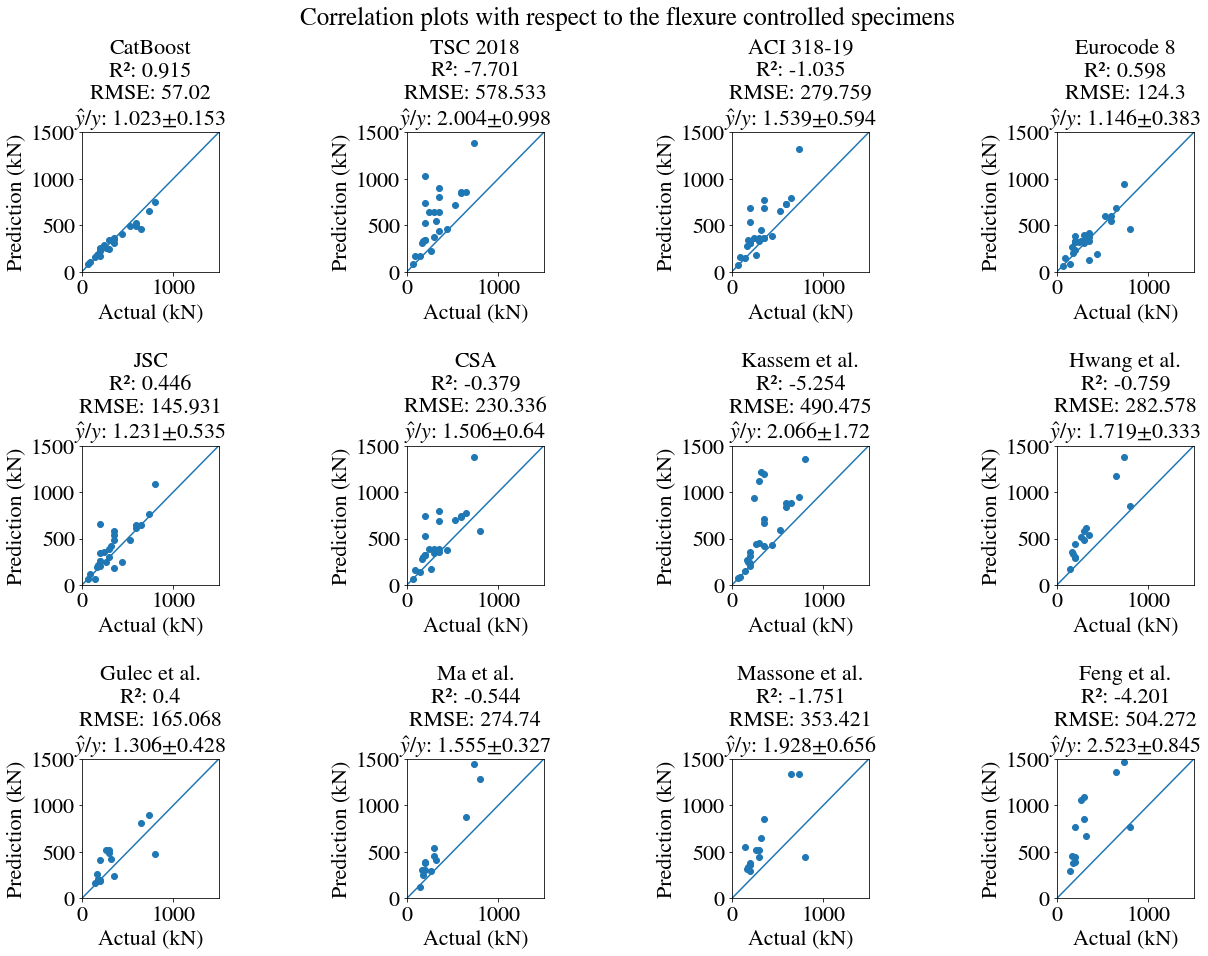

In [ ]:
y_pred_tsc2018 = y_tsc2018[X_test[X_test["failure_mode"]==3].index]
y_pred_aci = y_aci[X_test[X_test["failure_mode"]==3].index]
y_pred_ec8 = y_ec8[X_test[X_test["failure_mode"]==3].index]
y_pred_ec8.dropna(inplace=True)
y_pred_japan = y_japan[X_test[X_test["failure_mode"]==3].index]
y_pred_japan.dropna(inplace=True)
y_pred_canada = y_canada[X_test[X_test["failure_mode"]==3].index]
y_pred_canada.dropna(inplace=True)
y_pred_kassem = y_kassem[X_test[X_test["failure_mode"]==3].index]
y_pred_kassem.dropna(inplace=True)
y_pred_hwang = y_hwang[X_test[X_test["failure_mode"]==3].index]
y_pred_hwang.dropna(inplace=True)
y_pred_gulec = y_gulec[X_test[X_test["failure_mode"]==3].index]
y_pred_gulec.dropna(inplace=True)
y_pred_ma = y_ma[X_test[X_test["failure_mode"]==3].index]
y_pred_ma.dropna(inplace=True)
y_pred_massone = y_massone[X_test[X_test["failure_mode"]==3].index]
y_pred_massone.dropna(inplace=True)
y_pred_mangalathu = y_mangalathu[X_test[X_test["failure_mode"]==3].index]
y_pred_mangalathu.dropna(inplace=True)

y_pred = catb_tuned.predict(X_test.loc[y_pred_tsc2018.index, :])

r_score = r2_score(y_test.loc[y_pred_tsc2018.index], y_pred)
r_score_tsc2018 = r2_score(y_test.loc[y_pred_tsc2018.index], y_pred_tsc2018)
r_score_aci = r2_score(y_test.loc[y_pred_aci.index], y_pred_aci)
r_score_ec8 = r2_score(y_test.loc[y_pred_ec8.index], y_pred_ec8)
r_score_japan = r2_score(y_test.loc[y_pred_japan.index], y_pred_japan)
r_score_canada = r2_score(y_test.loc[y_pred_canada.index], y_pred_canada)
r_score_kassem = r2_score(y_test.loc[y_pred_kassem.index], y_pred_kassem)
r_score_hwang = r2_score(y_test.loc[y_pred_hwang.index], y_pred_hwang)
r_score_gulec = r2_score(y_test.loc[y_pred_gulec.index], y_pred_gulec)
r_score_ma = r2_score(y_test.loc[y_pred_ma.index], y_pred_ma)
r_score_massone = r2_score(y_test.loc[y_pred_massone.index], y_pred_massone)
r_score_mangalathu = r2_score(y_test.loc[y_pred_mangalathu.index], y_pred_mangalathu)


rmse = mean_squared_error(y_test.loc[y_pred_tsc2018.index], y_pred, squared=False)
rmse_tsc2018 = mean_squared_error(y_test.loc[y_pred_tsc2018.index], y_pred_tsc2018, squared=False)
rmse_aci = mean_squared_error(y_test.loc[y_pred_tsc2018.index], y_pred_aci, squared=False)
rmse_ec8 = mean_squared_error(y_test.loc[y_pred_ec8.index], y_pred_ec8, squared=False)
rmse_japan = mean_squared_error(y_test.loc[y_pred_japan.index], y_pred_japan, squared=False)
rmse_canada = mean_squared_error(y_test.loc[y_pred_canada.index], y_pred_canada, squared=False)
rmse_kassem = mean_squared_error(y_test.loc[y_pred_kassem.index], y_pred_kassem, squared=False)
rmse_hwang = mean_squared_error(y_test.loc[y_pred_hwang.index], y_pred_hwang, squared=False)
rmse_gulec = mean_squared_error(y_test.loc[y_pred_gulec.index], y_pred_gulec, squared=False)
rmse_ma = mean_squared_error(y_test.loc[y_pred_ma.index], y_pred_ma, squared=False)
rmse_massone = mean_squared_error(y_test.loc[y_pred_massone.index], y_pred_massone, squared=False)
rmse_mangalathu = mean_squared_error(y_test.loc[y_pred_mangalathu.index], y_pred_mangalathu, squared=False)


prediction_ratio = str(np.round(np.mean(y_pred / y_test.loc[y_pred_tsc2018.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred / y_test.loc[y_pred_tsc2018.index]), 3))
prediction_ratio_tsc2018 = str(np.round(np.mean(y_pred_tsc2018 / y_test.loc[y_pred_tsc2018.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_tsc2018 / y_test.loc[y_pred_tsc2018.index]), 3))
prediction_ratio_aci = str(np.round(np.mean(y_pred_aci / y_test.loc[y_pred_aci.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_aci / y_test.loc[y_pred_aci.index]), 3))
prediction_ratio_ec8 = str(np.round(np.mean(y_pred_ec8 / y_test.loc[y_pred_ec8.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_ec8 / y_test.loc[y_pred_ec8.index]), 3))
prediction_ratio_japan = str(np.round(np.mean(y_pred_japan / y_test.loc[y_pred_japan.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_japan / y_test.loc[y_pred_japan.index]), 3))
prediction_ratio_canada = str(np.round(np.mean(y_pred_canada / y_test.loc[y_pred_canada.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_canada / y_test.loc[y_pred_canada.index]), 3))
prediction_ratio_kassem = str(np.round(np.mean(y_pred_kassem / y_test.loc[y_pred_kassem.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_kassem / y_test.loc[y_pred_kassem.index]), 3))
prediction_ratio_hwang = str(np.round(np.mean(y_pred_hwang / y_test.loc[y_pred_hwang.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_hwang / y_test.loc[y_pred_hwang.index]), 3))
prediction_ratio_gulec = str(np.round(np.mean(y_pred_gulec / y_test.loc[y_pred_gulec.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_gulec / y_test.loc[y_pred_gulec.index]), 3))
prediction_ratio_ma = str(np.round(np.mean(y_pred_ma / y_test.loc[y_pred_ma.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_ma / y_test.loc[y_pred_ma.index]), 3))
prediction_ratio_massone = str(np.round(np.mean(y_pred_massone / y_test.loc[y_pred_massone.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_massone / y_test.loc[y_pred_massone.index]), 3))
prediction_ratio_mangalathu = str(np.round(np.mean(y_pred_mangalathu / y_test.loc[y_pred_mangalathu.index]), 3)) + r"$\pm$" + str(np.round(np.std(y_pred_mangalathu / y_test.loc[y_pred_mangalathu.index]), 3))


fig, axs = plt.subplots(3, 4, figsize=(20, 15))
plt.tight_layout(pad=14.0)
axs[0, 0].scatter(y_test.loc[y_pred_tsc2018.index], y_pred)
axs[0, 0].set_xlim([0, 1500])
axs[0, 0].set_ylim([0, 1500])
axs[0, 0].plot([0,1],[0,1], transform=axs[0, 0].transAxes)
axs[0, 0].set_xlabel('Actual (kN)')
axs[0, 0].set_ylabel("Prediction (kN)")
axs[0, 0].set_title(f"CatBoost\nR\u00b2: {round(r_score, 3)}\nRMSE: {round(rmse, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio)

axs[0, 1].scatter(y_test.loc[y_pred_tsc2018.index], y_pred_tsc2018)
axs[0, 1].set_xlim([0, 1500])
axs[0, 1].set_ylim([0, 1500])
axs[0, 1].plot([0,1],[0,1], transform=axs[0, 1].transAxes)
axs[0, 1].set_xlabel('Actual (kN)')
axs[0, 1].set_ylabel("Prediction (kN)")
axs[0, 1].set_title(f"TSC 2018\nR\u00b2: {round(r_score_tsc2018, 3)}\nRMSE: {round(rmse_tsc2018, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_tsc2018)

axs[0, 2].scatter(y_test.loc[y_pred_tsc2018.index], y_pred_aci)
axs[0, 2].set_xlim([0, 1500])
axs[0, 2].set_ylim([0, 1500])
axs[0, 2].plot([0,1],[0,1], transform=axs[0, 2].transAxes)
axs[0, 2].set_xlabel('Actual (kN)')
axs[0, 2].set_ylabel("Prediction (kN)")
axs[0, 2].set_title(f"ACI 318-19\nR\u00b2: {round(r_score_aci, 3)}\nRMSE: {round(rmse_aci, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_aci)

axs[0, 3].scatter(y_test.loc[y_pred_ec8.index], y_pred_ec8)
axs[0, 3].set_xlim([0, 1500])
axs[0, 3].set_ylim([0, 1500])
axs[0, 3].plot([0,1],[0,1], transform=axs[0, 3].transAxes)
axs[0, 3].set_xlabel('Actual (kN)')
axs[0, 3].set_ylabel("Prediction (kN)")
axs[0, 3].set_title(f"Eurocode 8\nR\u00b2: {round(r_score_ec8, 3)}\nRMSE: {round(rmse_ec8, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_ec8)


axs[1, 0].scatter(y_test.loc[y_pred_japan.index], y_pred_japan)
axs[1, 0].set_xlim([0, 1500])
axs[1, 0].set_ylim([0, 1500])
axs[1, 0].plot([0,1],[0,1], transform=axs[1, 0].transAxes)
axs[1, 0].set_xlabel('Actual (kN)')
axs[1, 0].set_ylabel("Prediction (kN)")
axs[1, 0].set_title(f"JSC\nR\u00b2: {round(r_score_japan, 3)}\nRMSE: {round(rmse_japan, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_japan)

axs[1, 1].scatter(y_test.loc[y_pred_canada.index], y_pred_canada)
axs[1, 1].set_xlim([0, 1500])
axs[1, 1].set_ylim([0, 1500])
axs[1, 1].plot([0,1],[0,1], transform=axs[1, 1].transAxes)
axs[1, 1].set_xlabel('Actual (kN)')
axs[1, 1].set_ylabel("Prediction (kN)")
axs[1, 1].set_title(f"CSA\nR\u00b2: {round(r_score_canada, 3)}\nRMSE: {round(rmse_canada, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_canada)

axs[1, 2].scatter(y_test.loc[y_pred_kassem.index], y_pred_kassem)
axs[1, 2].set_xlim([0, 1500])
axs[1, 2].set_ylim([0, 1500])
axs[1, 2].plot([0,1],[0,1], transform=axs[1, 2].transAxes)
axs[1, 2].set_xlabel('Actual (kN)')
axs[1, 2].set_ylabel("Prediction (kN)")
axs[1, 2].set_title(f"Kassem et al.\nR\u00b2: {round(r_score_kassem, 3)}\nRMSE: {round(rmse_kassem, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_kassem)

axs[1, 3].scatter(y_test.loc[y_pred_hwang.index], y_pred_hwang)
axs[1, 3].set_xlim([0, 1500])
axs[1, 3].set_ylim([0, 1500])
axs[1, 3].plot([0,1],[0,1], transform=axs[1, 3].transAxes)
axs[1, 3].set_xlabel('Actual (kN)')
axs[1, 3].set_ylabel("Prediction (kN)")
axs[1, 3].set_title(f"Hwang et al.\nR\u00b2: {round(r_score_hwang, 3)}\nRMSE: {round(rmse_hwang, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_hwang)


axs[2, 0].scatter(y_test.loc[y_pred_gulec.index], y_pred_gulec)
axs[2, 0].set_xlim([0, 1500])
axs[2, 0].set_ylim([0, 1500])
axs[2, 0].plot([0,1],[0,1], transform=axs[2, 0].transAxes)
axs[2, 0].set_xlabel('Actual (kN)')
axs[2, 0].set_ylabel("Prediction (kN)")
axs[2, 0].set_title(f"Gulec et al.\nR\u00b2: {round(r_score_gulec, 3)}\nRMSE: {round(rmse_gulec, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_gulec)

axs[2, 1].scatter(y_test.loc[y_pred_ma.index], y_pred_ma)
axs[2, 1].set_xlim([0, 1500])
axs[2, 1].set_ylim([0, 1500])
axs[2, 1].plot([0,1],[0,1], transform=axs[2, 1].transAxes)
axs[2, 1].set_xlabel('Actual (kN)')
axs[2, 1].set_ylabel("Prediction (kN)")
axs[2, 1].set_title(f"Ma et al.\nR\u00b2: {round(r_score_ma, 3)}\nRMSE: {round(rmse_ma, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_ma)

axs[2, 2].scatter(y_test.loc[y_pred_massone.index], y_pred_massone)
axs[2, 2].set_xlim([0, 1500])
axs[2, 2].set_ylim([0, 1500])
axs[2, 2].plot([0,1],[0,1], transform=axs[2, 2].transAxes)
axs[2, 2].set_xlabel('Actual (kN)')
axs[2, 2].set_ylabel("Prediction (kN)")
axs[2, 2].set_title(f"Massone et al.\nR\u00b2: {round(r_score_massone, 3)}\nRMSE: {round(rmse_massone, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_massone)

axs[2, 3].scatter(y_test.loc[y_pred_mangalathu.index], y_pred_mangalathu)
axs[2, 3].set_xlim([0, 1500])
axs[2, 3].set_ylim([0, 1500])
axs[2, 3].plot([0,1],[0,1], transform=axs[2, 3].transAxes)
axs[2, 3].set_xlabel('Actual (kN)')
axs[2, 3].set_ylabel("Prediction (kN)")
axs[2, 3].set_title(f"Feng et al.\nR\u00b2: {round(r_score_mangalathu, 3)}\nRMSE: {round(rmse_mangalathu, 3)}\n" + r"$\hat{y}/y$: " + prediction_ratio_mangalathu)

fig.suptitle('Correlation plots with respect to the flexure controlled specimens', fontsize=25)

plt.show()